### Outline of the project 
1. Downloading the Dataset
2. EDA 
3. Preparation of Dataset for Training
4. Train Hardcoded & Baseline Models
5. Making Predictions 
6. Performance Feature Engineering
7. Train and Evaluate Different Models
8. Hyperparameter Tuning


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
selected_cols = 'fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count'.split(',')

dtypes = {
    'fare_amount': 'float32',
    'pickup_longitude': 'float32',
    'pickup_latitude': 'float32',
    'dropoff_longitude': 'float32',
    'dropoff_latitude' : 'float32',
    'passenger_count': 'uint8'
}
sample_fraction = 0.01
random.seed(42)
def skip_row(row_idx):
    if row_idx == 0:
        return False
    return random.random() > sample_fraction
    
#selected only 1% of the data, i.e. 500,000 rows
data_dir = 'P:\\____LearningSomethingNew\\MachineLearning18HFreecodecamp\\new-york-city-taxi-fare-prediction'
df = pd.read_csv(data_dir + "\\train.csv", 
                 usecols=selected_cols, 
                 dtype=dtypes, 
                 skiprows=skip_row,
                parse_dates = ['pickup_datetime'])
df = pd.DataFrame(df)
df.head()


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.0,2014-12-06 20:36:22+00:00,-73.979813,40.751904,-73.979446,40.755482,1
1,8.0,2013-01-17 17:22:00+00:00,0.000000,0.000000,0.000000,0.000000,2
2,8.9,2011-06-15 18:07:00+00:00,-73.996330,40.753223,-73.978897,40.766964,3
3,6.9,2009-12-14 12:33:00+00:00,-73.982430,40.745747,-73.982430,40.745747,1
4,7.0,2013-11-06 11:26:54+00:00,-73.959061,40.781059,-73.962059,40.768604,1


This is a supervised Regression problem

In [5]:
test_df = pd.read_csv(data_dir+'/test.csv', dtype=dtypes, parse_dates=['pickup_datetime'])
test_df

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44+00:00,-73.982521,40.751259,-73.979652,40.746140,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12+00:00,-73.981163,40.767807,-73.990448,40.751637,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12+00:00,-73.966049,40.789776,-73.988564,40.744427,1
...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51.0000002,2015-05-10 12:37:51+00:00,-73.968124,40.796997,-73.955643,40.780388,6
9910,2015-01-12 17:05:51.0000001,2015-01-12 17:05:51+00:00,-73.945511,40.803600,-73.960213,40.776371,6
9911,2015-04-19 20:44:15.0000001,2015-04-19 20:44:15+00:00,-73.991600,40.726608,-73.789742,40.647011,6
9912,2015-01-31 01:05:19.0000005,2015-01-31 01:05:19+00:00,-73.985573,40.735432,-73.939178,40.801731,6


## Explore the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552450 entries, 0 to 552449
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        552450 non-null  float32            
 1   pickup_datetime    552450 non-null  datetime64[ns, UTC]
 2   pickup_longitude   552450 non-null  float32            
 3   pickup_latitude    552450 non-null  float32            
 4   dropoff_longitude  552450 non-null  float32            
 5   dropoff_latitude   552450 non-null  float32            
 6   passenger_count    552450 non-null  uint8              
dtypes: datetime64[ns, UTC](1), float32(5), uint8(1)
memory usage: 15.3 MB


In [8]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,552450.000000,552450.000000,552450.000000,552450.000000,552450.000000,552450.000000
mean,11.354059,-72.497063,39.910500,-72.504326,39.934265,1.684983
std,9.810809,11.622035,8.041162,12.065184,9.226158,1.337664
min,-52.000000,-1183.362793,-3084.490234,-3356.729736,-2073.150635,0.000000
25%,6.000000,-73.992020,40.734875,-73.991425,40.733990,1.000000
50%,8.500000,-73.981819,40.752621,-73.980179,40.753101,1.000000
75%,12.500000,-73.967155,40.767036,-73.963737,40.768059,2.000000
max,499.000000,2420.209473,404.983337,2467.752686,3351.403076,208.000000


In [9]:
df['pickup_datetime'].min(), df['pickup_datetime'].max() 

(Timestamp('2009-01-01 00:11:46+0000', tz='UTC'),
 Timestamp('2015-06-30 23:59:54+0000', tz='UTC'))

In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   key                9914 non-null   object             
 1   pickup_datetime    9914 non-null   datetime64[ns, UTC]
 2   pickup_longitude   9914 non-null   float32            
 3   pickup_latitude    9914 non-null   float32            
 4   dropoff_longitude  9914 non-null   float32            
 5   dropoff_latitude   9914 non-null   float32            
 6   passenger_count    9914 non-null   uint8              
dtypes: datetime64[ns, UTC](1), float32(4), object(1), uint8(1)
memory usage: 319.6+ KB


In [11]:
test_df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974716,40.751041,-73.973656,40.751740,1.671273
std,0.042799,0.033542,0.039093,0.035436,1.278747
min,-74.252190,40.573143,-74.263245,40.568974,1.000000
25%,-73.992500,40.736125,-73.991249,40.735253,1.000000
50%,-73.982327,40.753052,-73.980015,40.754065,1.000000
75%,-73.968012,40.767113,-73.964062,40.768757,2.000000
max,-72.986534,41.709557,-72.990967,41.696682,6.000000


In [12]:
test_df['pickup_datetime'].min(), test_df['pickup_datetime'].max() 

(Timestamp('2009-01-01 11:04:24+0000', tz='UTC'),
 Timestamp('2015-06-30 20:03:50+0000', tz='UTC'))

### Visulaization

## 3. Prepare Dataset for Training

- Split Training & Validation Set
- Fill/Remove Missing Values
- Extract Inputs & Outputs
   - Training
   - Validation
   - Test

In [15]:
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)
len(train_df), len(val_df)

(441960, 110490)

In [16]:
## No null/missing values in the dataset :)
train_df = train_df.dropna()
val_df = val_df.dropna()

### Extract Inputs and Outputs

In [18]:
train_df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [19]:
input_cols = ['pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'passenger_count']
target_col = 'fare_amount'

In [20]:
train_inputs = train_df[input_cols]
train_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
353352,-73.993652,40.741543,-73.977974,40.742352,4
360070,-73.993805,40.724579,-73.993805,40.724579,1
372609,-73.959160,40.780750,-73.969116,40.761230,1
550895,-73.952187,40.783951,-73.978645,40.772602,1
444151,-73.977112,40.746834,-73.991104,40.750404,2
...,...,...,...,...,...
110268,-73.987152,40.750633,-73.979073,40.763168,1
259178,-73.972656,40.764042,-74.013176,40.707840,2
365838,-73.991982,40.749767,-73.989845,40.720551,3
131932,-73.969055,40.761398,-73.990814,40.751328,1


In [21]:
train_targets = train_df[target_col]
train_targets

353352     6.0
360070     3.7
372609    10.0
550895     8.9
444151     7.3
          ... 
110268     9.3
259178    18.5
365838    10.1
131932    10.9
121958     9.5
Name: fare_amount, Length: 441960, dtype: float32

In [22]:
val_inputs = val_df[input_cols]
val_targets = val_df[target_col]

In [23]:
test_inputs = test_df[input_cols]
test_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,-73.973320,40.763805,-73.981430,40.743835,1
1,-73.986862,40.719383,-73.998886,40.739201,1
2,-73.982521,40.751259,-73.979652,40.746140,1
3,-73.981163,40.767807,-73.990448,40.751637,1
4,-73.966049,40.789776,-73.988564,40.744427,1
...,...,...,...,...,...
9909,-73.968124,40.796997,-73.955643,40.780388,6
9910,-73.945511,40.803600,-73.960213,40.776371,6
9911,-73.991600,40.726608,-73.789742,40.647011,6
9912,-73.985573,40.735432,-73.939178,40.801731,6


## 4. Train Hardcoded & Baseline Models

- Hardcoded model: always predict average fare
- Baseline model: Linear regression 

For evaluation the dataset uses RMSE error: 
https://www.kaggle.com/c/new-york-city-taxi-fare-prediction/overview/evaluation

In [25]:
class MeanRegressor:
    def fit(self, inputs, targets):
        self.mean = targets.mean()

    def predict(self, inputs):
        return np.full(inputs.shape[0], self.mean)

In [26]:
mean_model = MeanRegressor()
mean_model.fit(train_inputs, train_targets)
mean_model.mean

11.354714

In [27]:
train_preds = mean_model.predict(train_inputs)

In [28]:
val_preds = mean_model.predict(val_inputs)
val_preds

array([11.354714, 11.354714, 11.354714, ..., 11.354714, 11.354714,
       11.354714], dtype=float32)

In [29]:
from sklearn.metrics import root_mean_squared_error

def rmse(targets, predictions):
    return root_mean_squared_error(targets, predictions)

In [30]:
train_rmse = rmse(train_targets, train_preds)
train_rmse

9.789782

In [31]:
val_rmse = rmse(val_targets, val_preds)
val_rmse

9.899954

In [32]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

In [33]:
linear_model.fit(train_inputs, train_targets)

LinearRegression()

In [34]:
train_preds = linear_model.predict(train_inputs)
train_preds

array([11.546229 , 11.284613 , 11.2841425, ..., 11.458913 , 11.284283 ,
       11.284451 ], dtype=float32)

In [35]:
rmse(train_preds, train_targets)

9.788632

In [36]:
val_preds = linear_model.predict(val_inputs)
rmse(val_targets, val_preds)

9.898088

In [37]:
def predict_and_submit(model, test_inputs, fname):
    test_preds = model.predict(test_inputs)
    sub_df = pd.read_csv(data_dir + "\\sample_submission.csv")
    sub_df['fare_amount'] = test_preds
    sub_df.to_csv(fname, index=None)
    return sub_df

### Feature Engineering

In [39]:
def add_dateparts(df, col):
    df[col + '_year'] = df[col].dt.year
    df[col + '_month'] = df[col].dt.month
    df[col + '_day'] = df[col].dt.day
    df[col + '_weekday'] = df[col].dt.weekday
    df[col + '_hour'] = df[col].dt.hour

In [40]:
col = 'pickup_datetime'
train_df[col]
# train_df

353352   2015-04-12 03:40:38+00:00
360070   2011-01-26 19:21:00+00:00
372609   2012-10-03 10:40:17+00:00
550895   2012-03-14 13:44:27+00:00
444151   2012-02-05 15:33:00+00:00
                    ...           
110268   2009-09-06 16:12:00+00:00
259178   2009-04-12 09:58:56+00:00
365838   2012-07-12 19:30:00+00:00
131932   2011-02-17 18:33:00+00:00
121958   2015-01-14 17:35:03+00:00
Name: pickup_datetime, Length: 441960, dtype: datetime64[ns, UTC]

In [41]:
add_dateparts(train_df, 'pickup_datetime')

In [42]:
train_df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_datetime_year', 'pickup_datetime_month', 'pickup_datetime_day',
       'pickup_datetime_weekday', 'pickup_datetime_hour'],
      dtype='object')

In [43]:
add_dateparts(val_df, 'pickup_datetime')

In [44]:
add_dateparts(test_df, 'pickup_datetime')

#### Add distance between pickup and Drop

In [46]:
import numpy as np
## Using haversine distances to find the distance from the coordinates
## https://stackoverflow.com/questions/29545704/fast-haversine-approximation-python-pandas
def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [47]:
def add_trip_distance(df):
    df['trip_distance'] = haversine_np(df['pickup_longitude'], 
                                       df['pickup_latitude'], 
                                       df['dropoff_longitude'], 
                                       df['dropoff_latitude'])

In [48]:
add_trip_distance(train_df)
add_trip_distance(val_df)
add_trip_distance(test_df)


In [49]:
train_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance
353352,6.0,2015-04-12 03:40:38+00:00,-73.993652,40.741543,-73.977974,40.742352,4,2015,4,12,6,3,1.323411
360070,3.7,2011-01-26 19:21:00+00:00,-73.993805,40.724579,-73.993805,40.724579,1,2011,1,26,2,19,0.000000
372609,10.0,2012-10-03 10:40:17+00:00,-73.959160,40.780750,-73.969116,40.761230,1,2012,10,3,2,10,2.325504
550895,8.9,2012-03-14 13:44:27+00:00,-73.952187,40.783951,-73.978645,40.772602,1,2012,3,14,2,13,2.558912
444151,7.3,2012-02-05 15:33:00+00:00,-73.977112,40.746834,-73.991104,40.750404,2,2012,2,5,6,15,1.243267
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,9.3,2009-09-06 16:12:00+00:00,-73.987152,40.750633,-73.979073,40.763168,1,2009,9,6,6,16,1.549976
259178,18.5,2009-04-12 09:58:56+00:00,-73.972656,40.764042,-74.013176,40.707840,2,2009,4,12,6,9,7.116529
365838,10.1,2012-07-12 19:30:00+00:00,-73.991982,40.749767,-73.989845,40.720551,3,2012,7,12,3,19,3.251601
131932,10.9,2011-02-17 18:33:00+00:00,-73.969055,40.761398,-73.990814,40.751328,1,2011,2,17,3,18,2.146101


### Add Distance From Popular Landmarks

- JFK Airport
- LGA Airport
- EWR Airport
- Times Square
- Met Meuseum
- World Trade Center

We'll add the distance from drop location. <br>
#### Creative Feature Engineering

In [51]:
jfk_lonlat = -73.7781, 40.6413
lga_lonlat = -73.8740, 40.7769
ewr_lonlat = -74.1745, 40.6895
met_lonlat = -73.9632, 40.7794
wtc_lonlat = -74.0099, 40.7126

In [52]:
def add_landmark_dropoff_distance(df, landmark_name, landmark_lonlat):
    lon, lat = landmark_lonlat
    df[landmark_name + '_drop_distance'] = haversine_np(lon, lat, df['dropoff_longitude'], df['dropoff_latitude'])

In [53]:
%%time
for a_df in [train_df, val_df, test_df]:
    for name, lonlat in [('jfk', jfk_lonlat), ('lga', lga_lonlat), ('ewr', ewr_lonlat), ('met', met_lonlat), ('wtc', wtc_lonlat)]:
        add_landmark_dropoff_distance(a_df, name, lonlat)

CPU times: total: 109 ms
Wall time: 102 ms


In [54]:
# train_df

#### Remove outliers and Invalid Data

In [56]:
train_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
count,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000
mean,11.354714,-72.498627,39.909996,-72.508141,39.937862,1.684444,2011.740038,6.263920,15.732492,3.035813,13.506568,19.751762,193.148026,182.365189,191.412308,177.416016,178.902069
std,9.788187,11.826187,8.449581,12.422503,9.833958,1.344170,1.857024,3.434881,8.697374,1.950033,6.517710,370.978485,1222.565186,1225.509888,1227.219604,1227.147827,1227.168091
min,-52.000000,-1183.362793,-3084.490234,-3356.729736,-2073.150635,0.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.305583,0.116402,0.129245,0.031195,0.009281
25%,6.000000,-73.992027,40.734859,-73.991409,40.733967,1.000000,2010.000000,3.000000,8.000000,1.000000,9.000000,1.212447,20.535247,8.350981,16.502820,2.169769,3.642480
50%,8.500000,-73.981819,40.752613,-73.980171,40.753078,1.000000,2012.000000,6.000000,16.000000,3.000000,14.000000,2.116254,21.202131,9.575539,18.016346,3.817937,5.559632
75%,12.500000,-73.967186,40.767006,-73.963715,40.768044,2.000000,2013.000000,9.000000,23.000000,5.000000,19.000000,3.879624,21.948318,11.122054,19.953297,6.071617,7.814558
max,400.000000,2420.209473,404.899994,2467.752686,3351.403076,208.000000,2015.000000,12.000000,31.000000,6.000000,23.000000,16913.427734,15057.673828,15074.642578,15074.713867,15077.615234,15072.110352


In [57]:
test_df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974716,40.751041,-73.973656,40.751740,1.671273,2011.815816,6.857979,16.194170,2.852834,13.467420,3.433216,20.916754,9.675180,18.546659,4.512898,6.037652
std,0.042799,0.033542,0.039093,0.035436,1.278747,1.803347,3.353272,8.838482,1.994451,6.868584,3.969877,3.303940,3.295646,4.035816,4.018422,4.252535
min,-74.252190,40.573143,-74.263245,40.568974,1.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.401900,0.285629,0.284680,0.085747,0.040269
25%,-73.992500,40.736125,-73.991249,40.735253,1.000000,2010.000000,4.000000,9.000000,1.000000,8.000000,1.297261,20.513337,8.311565,16.520517,2.126287,3.670107
50%,-73.982327,40.753052,-73.980015,40.754065,1.000000,2012.000000,7.000000,16.000000,3.000000,15.000000,2.215648,21.181472,9.477797,18.024350,3.698123,5.541466
75%,-73.968012,40.767113,-73.964062,40.768757,2.000000,2014.000000,10.000000,25.000000,5.000000,19.000000,4.043051,21.909794,10.965272,19.880536,5.922544,7.757612
max,-72.986534,41.709557,-72.990967,41.696682,6.000000,2015.000000,12.000000,31.000000,6.000000,23.000000,99.933281,134.497726,126.062576,149.400787,130.347153,138.619492


In [58]:
def remove_outliers(df):
    return df[(df['fare_amount'] >= 1.) & 
              (df['fare_amount'] <= 500.) &
              (df['pickup_longitude'] >= -75) & 
              (df['pickup_longitude'] <= -72) & 
              (df['dropoff_longitude'] >= -75) & 
              (df['dropoff_longitude'] <= -72) & 
              (df['pickup_latitude'] >= 40) & 
              (df['pickup_latitude'] <= 42) & 
              (df['dropoff_latitude'] >=40) & 
              (df['dropoff_latitude'] <= 42) & 
              (df['passenger_count'] >= 1) & 
              (df['passenger_count'] <= 6)]

In [59]:
train_df = remove_outliers(train_df)

In [60]:
val_df = remove_outliers(val_df)

In [61]:
train_df.to_parquet('train.parquet')
val_df.to_parquet('val.parquet')
test_df.to_parquet('test.parquet')

#### Scaling and OneHot Encoding
I'll do it 

 ## 7. Train & Evaluate Different Models

We'll train each of the following & submit predictions to Kaggle:

- Linear Regression
- Random Forests
- Gradient Boosting

Exercise: Train Ridge, SVM, KNN, Decision Tree models

In [64]:
train_df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_datetime_year', 'pickup_datetime_month', 'pickup_datetime_day',
       'pickup_datetime_weekday', 'pickup_datetime_hour', 'trip_distance',
       'jfk_drop_distance', 'lga_drop_distance', 'ewr_drop_distance',
       'met_drop_distance', 'wtc_drop_distance'],
      dtype='object')

In [65]:
input_cols = ['pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_datetime_year', 'pickup_datetime_month', 'pickup_datetime_day',
       'pickup_datetime_weekday', 'pickup_datetime_hour', 'trip_distance',
       'jfk_drop_distance', 'lga_drop_distance', 'ewr_drop_distance',
       'met_drop_distance', 'wtc_drop_distance']

In [66]:
target_col = 'fare_amount'

In [67]:
train_inputs = train_df[input_cols]
train_targets = train_df[target_col]

In [68]:
val_inputs = val_df[input_cols]
val_targets = val_df[target_col]

In [69]:
test_inputs = test_df[input_cols]

In [70]:
# Helper function to train and evaluate the model
def evaluate(model):
    train_preds = model.predict(train_inputs)
    train_rmse = root_mean_squared_error(train_targets, train_preds)
    val_preds = model.predict(val_inputs)
    val_rmse = root_mean_squared_error(val_targets, val_preds)
    return train_rmse, val_rmse, train_preds, val_preds

In [71]:
def predict_and_submit(model, fname):
    test_preds = model.predict(test_inputs)
    sub_df = pd.read_csv(data_dir+'/sample_submission.csv')
    sub_df['fare_amount'] = test_preds
    sub_df.to_csv(fname, index=None)
    return sub_df

#### Ridge Regression

In [73]:
from sklearn.linear_model import Ridge
model1 = Ridge(random_state=42, alpha=0.9)
model1.fit(train_inputs, train_targets)

Ridge(alpha=0.9, random_state=42)

In [74]:
evaluate(model1)

(5.0493140439293365,
 5.2178456186122375,
 array([ 8.12923647,  4.11617242,  8.75016006, ..., 10.47209139,
         8.2307147 , 10.5869553 ]),
 array([10.91913868,  6.20507267, 46.2188478 , ...,  8.04612766,
        25.56777317,  8.45283364]))

In [75]:
predict_and_submit(model1, 'ridge_submission.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.081975
1,2015-01-27 13:08:24.0000003,11.400098
2,2011-10-08 11:53:44.0000002,5.356945
3,2012-12-01 21:12:12.0000002,8.763523
4,2012-12-01 21:12:12.0000003,14.609347
...,...,...
9909,2015-05-10 12:37:51.0000002,9.024146
9910,2015-01-12 17:05:51.0000001,11.217690
9911,2015-04-19 20:44:15.0000001,47.927670
9912,2015-01-31 01:05:19.0000005,22.600264


#### Random Forest

In [77]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(random_state=42, n_jobs= -1, max_depth=10, n_estimators=100)


In [78]:
%%time
model2.fit(train_inputs, train_targets)

CPU times: total: 19min 38s
Wall time: 2min 36s


RandomForestRegressor(max_depth=10, n_jobs=-1, random_state=42)

In [79]:
evaluate(model2)

(3.5955102502414134,
 4.161216507784617,
 array([ 6.99399909,  9.10190057,  9.09379987, ..., 10.43082088,
         7.782156  , 10.400694  ]),
 array([12.65433613,  6.14604627, 47.31069124, ...,  8.36589355,
        29.27069612,  8.24300662]))

In [80]:
predict_and_submit(model2, 'rf_submission.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.479748
1,2015-01-27 13:08:24.0000003,10.468653
2,2011-10-08 11:53:44.0000002,5.046148
3,2012-12-01 21:12:12.0000002,8.481902
4,2012-12-01 21:12:12.0000003,14.300374
...,...,...
9909,2015-05-10 12:37:51.0000002,8.694722
9910,2015-01-12 17:05:51.0000001,12.535128
9911,2015-04-19 20:44:15.0000001,55.355344
9912,2015-01-31 01:05:19.0000005,21.467722


#### Gradient Boosting

In [82]:
from xgboost import XGBRegressor
model3 = XGBRegressor(max_depth=5, objective='reg:squarederror', 
                      n_estimators=200, random_state=42, n_jobs=-1)
model3.fit(train_inputs, train_targets)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [83]:
evaluate(model3)

(3.1945446,
 4.027133,
 array([ 6.5086284,  8.475021 , 10.250745 , ..., 11.6175   ,  9.493622 ,
        10.145834 ], dtype=float32),
 array([14.869394 ,  5.5537467, 48.604473 , ...,  7.853152 , 31.240097 ,
         8.467824 ], dtype=float32))

In [84]:
predict_and_submit(model1, 'xgb_submission.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.081975
1,2015-01-27 13:08:24.0000003,11.400098
2,2011-10-08 11:53:44.0000002,5.356945
3,2012-12-01 21:12:12.0000002,8.763523
4,2012-12-01 21:12:12.0000003,14.609347
...,...,...
9909,2015-05-10 12:37:51.0000002,9.024146
9910,2015-01-12 17:05:51.0000001,11.217690
9911,2015-04-19 20:44:15.0000001,47.927670
9912,2015-01-31 01:05:19.0000005,22.600264


## 8. Tune Hyperparmeters

https://towardsdatascience.com/mastering-xgboost-2eb6bce6bc76


We'll train parameters for the XGBoost model. Here’s a strategy for tuning hyperparameters:

- Tune the most important/impactful hyperparameter first e.g. n_estimators

- With the best value of the first hyperparameter, tune the next most impactful hyperparameter

- And so on, keep training the next most impactful parameters with the best values for previous parameters...

- Then, go back to the top and further tune each parameter again for further marginal gains

- Hyperparameter tuning is more art than science, unfortunately. Try to get a feel for how the parameters interact with each other based on your understanding of the parameter…

Let's define a helper function for trying different hyperparameters.

In [86]:
import matplotlib.pyplot as plt

def test_params(ModelClass, **params):
    """Trains a model with the given parameters and returns training & validation RMSE"""
    model = ModelClass(**params).fit(train_inputs, train_targets)
    train_rmse = root_mean_squared_error(model.predict(train_inputs), train_targets)
    val_rmse = root_mean_squared_error(model.predict(val_inputs), val_targets)
    return train_rmse, val_rmse

def test_param_and_plot(ModelClass, param_name, param_values, **other_params):
    """Trains multiple models by varying the value of param_name according to param_values"""
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = dict(other_params)
        params[param_name] = value
        train_rmse, val_rmse = test_params(ModelClass, **params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

In [87]:
best_params = {
    'random_state': 42,
    'n_jobs': -1,
    'objective': 'reg:squarederror',
    'learning_rate' : 0.05
}

CPU times: total: 2min 30s
Wall time: 20.6 s


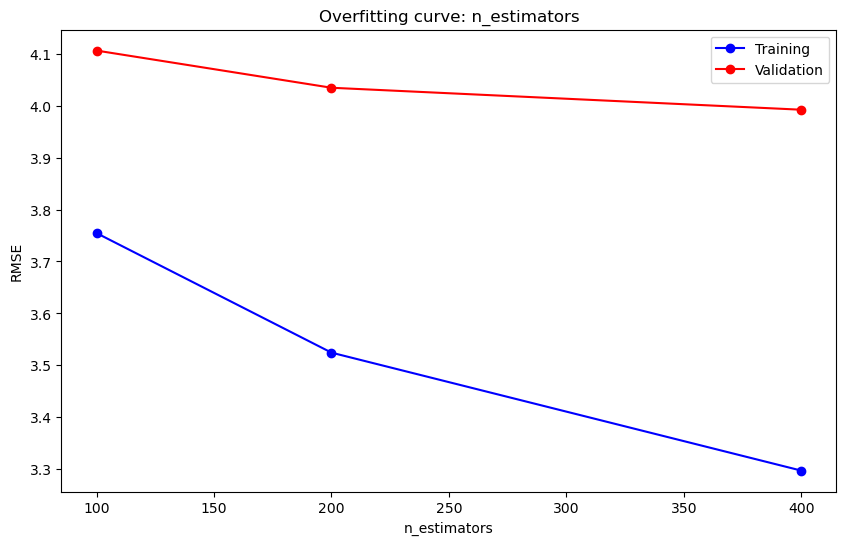

In [88]:
%%time
test_param_and_plot(XGBRegressor, 'n_estimators', [100,200,400], **best_params)

In [89]:
# best_params['n_estimators'] = 

CPU times: total: 6min 24s
Wall time: 57.4 s


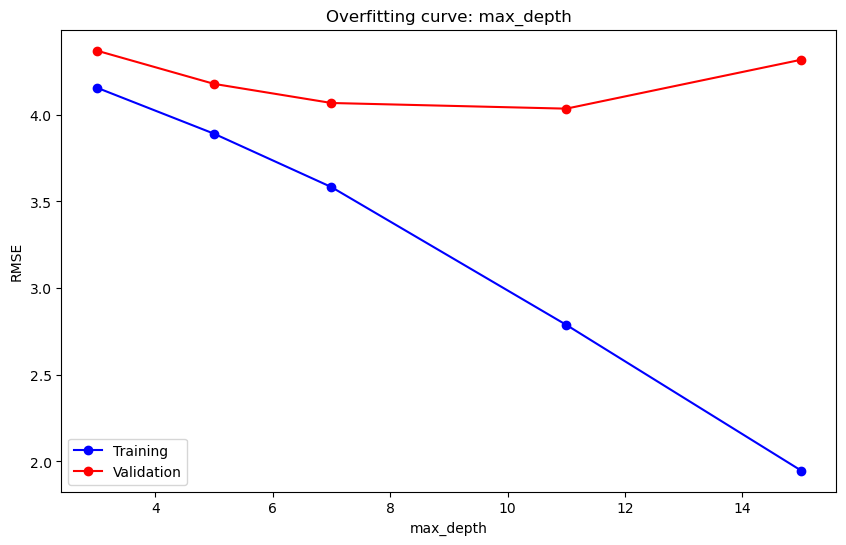

In [90]:
%%time
test_param_and_plot(XGBRegressor, 'max_depth', [3,5,7,11,15], **best_params)

CPU times: total: 1min 13s
Wall time: 12.4 s


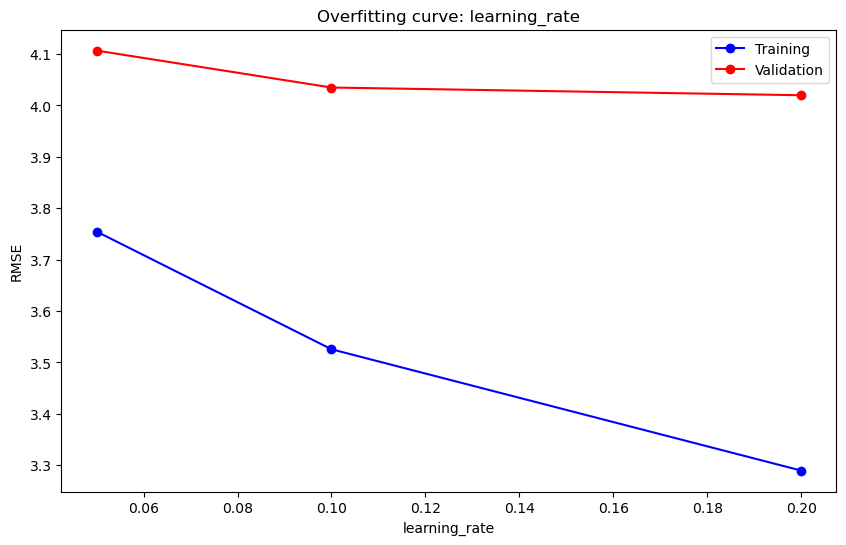

In [91]:
%%time
test_param_and_plot(XGBRegressor, 'learning_rate', [0.05,0.1,0.2], **best_params)

In [92]:
best_params['max_depth'] = 7

In [93]:
# best_params['learning_rate'] = 

In [94]:
xgb_model_final = XGBRegressor(objective='reg:squarederror', n_jobs=-1, random_state=42,
                               n_estimators=500, max_depth=5, learning_rate=0.1, 
                               subsample=0.8, colsample_bytree=0.8)

In [95]:
xgb_model_final.fit(train_inputs, train_targets)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [96]:
evaluate(xgb_model_final)

(3.2218776,
 3.9909408,
 array([ 6.562426 ,  8.059741 ,  9.9519005, ..., 11.521586 ,  9.313522 ,
        10.312841 ], dtype=float32),
 array([14.465576 ,  5.9590173, 47.791412 , ...,  7.711904 , 29.873508 ,
         8.681709 ], dtype=float32))

In [97]:
predict_and_submit(xgb_model_final, 'xgb_tuned_submission.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.826940
1,2015-01-27 13:08:24.0000003,11.075544
2,2011-10-08 11:53:44.0000002,4.667068
3,2012-12-01 21:12:12.0000002,8.673422
4,2012-12-01 21:12:12.0000003,15.884023
...,...,...
9909,2015-05-10 12:37:51.0000002,8.750971
9910,2015-01-12 17:05:51.0000001,11.595016
9911,2015-04-19 20:44:15.0000001,53.555180
9912,2015-01-31 01:05:19.0000005,19.748852


In [98]:
import joblib
joblib.dump(xgb_model_final, 'xgb_model_final.joblib')

['xgb_model_final.joblib']